# PROJECT 2: 
## MODEL ANALYSIS PROJECT# Model Project

ProgEcon: Project 2

Group: Nikolaj and Fanny

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# user written modules
import modelproject
from Worker import WorkerClass
from Government import GovernmentClass
#test1

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 1. Labor supply

## 1.1 Numerical optimizer vs root-finder

__Summary of Findings :__

For all values of $\epsilon \in \{1.0, 0.75, 0.5\}$ the numerical optimizer and the root-finder produce nearly the same optimal labor supply. As $\epsilon$ decreases, the disutility of labor becomes weaker and the optimal labor supply increases. At $\epsilon =0.5$ the upper bound is reached. 

The utility and FOC plots confirm this: both the utility maximum and the zero of the FOC shift to higher labor levels as $\epsilon $ falls. The optimizer handles boundary solutions more reliably, while the root-finder is faster for interior solutions. Overall, both methods are consistent and yield identical results.

__perfect__

epsilon = 1.0
  ell* (optimizer):   8.265578
  ell* (root finder): 8.265578



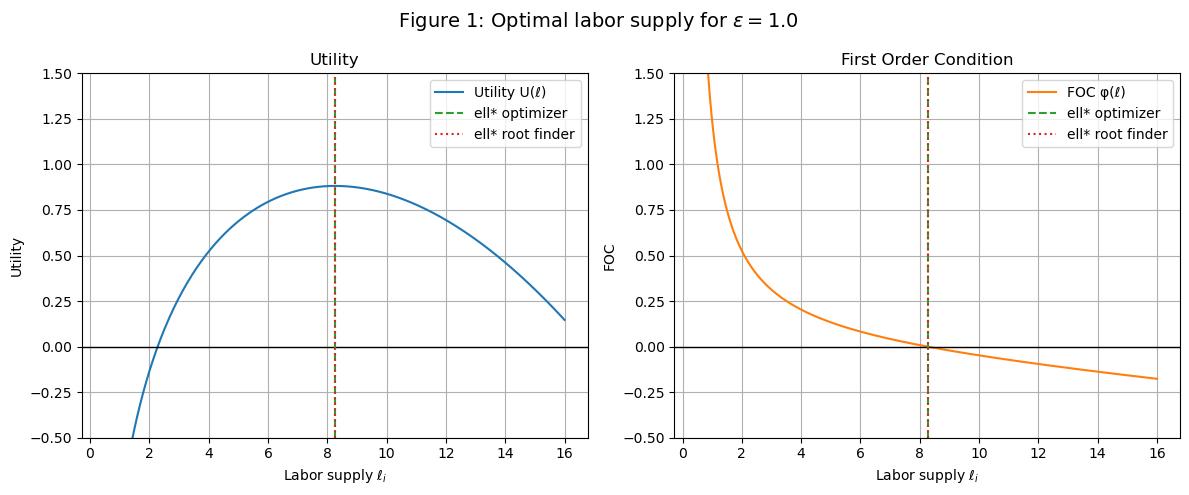

epsilon = 0.75
  ell* (optimizer):   11.136048
  ell* (root finder): 11.136048



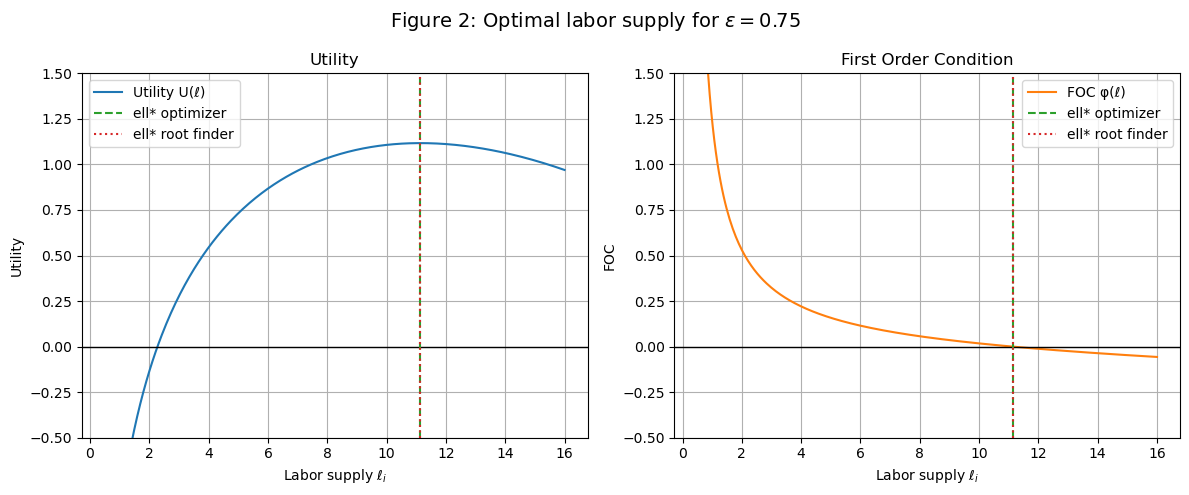

epsilon = 0.5
  ell* (optimizer):   15.999996
  ell* (root finder): 16.000000



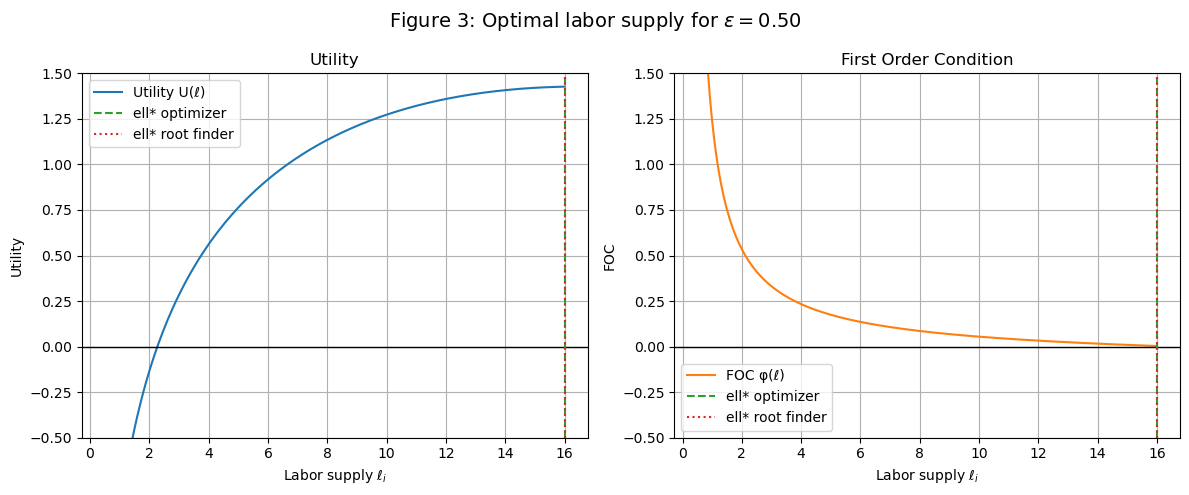

In [19]:
worker = WorkerClass()
p = 1.0

worker.plot_for_epsilon(1.0,  p, r' Figure 1: Optimal labor supply for $\epsilon = 1.0$')
worker.plot_for_epsilon(0.75, p, r'Figure 2: Optimal labor supply for $\epsilon = 0.75$')
worker.plot_for_epsilon(0.50, p, r'Figure 3: Optimal labor supply for $\epsilon = 0.50$')


## 1.2 Labor supply function

__Summary of Findings :__
Figure 4 shows that positive and negative lump-sum taxes affect labor supply in opposite directions, with a positive tax increasing hours worked and a negative tax reducing them.


__maybe also comment on the changed slope__

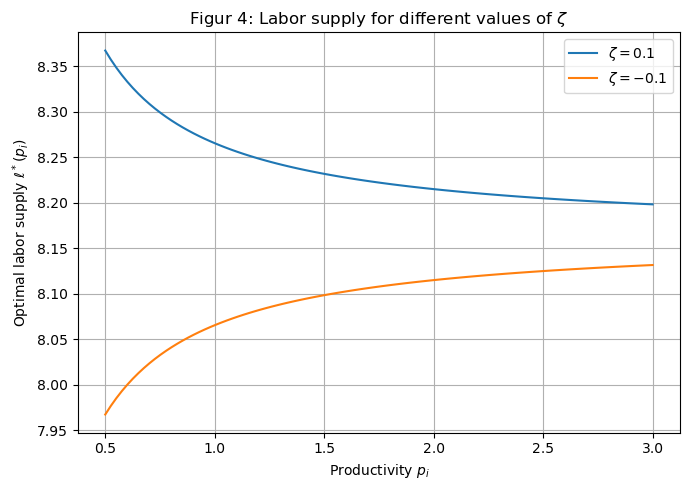

In [20]:
worker.plot_labor_supply(0.10, -0.10) 

# 2. Public good

## 2.1 Tax revenue and SocialWelfare Function

__correct:) if you need a challenge you could utilize arrays instead of loops for a muuuuch faster execution time (down to a fraction of a second).__

__you seem to be doing the same thing twice, and do not calcuate the optimal tau for each of the zetas.__

=== Test run for tau = 0.50, zeta = 0.10 ===
T = 417.8977922823345
SWF = 174.04499045420636



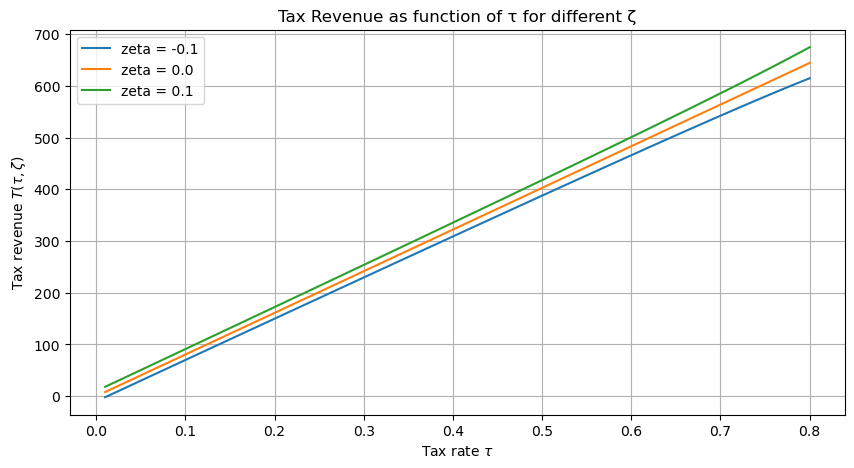

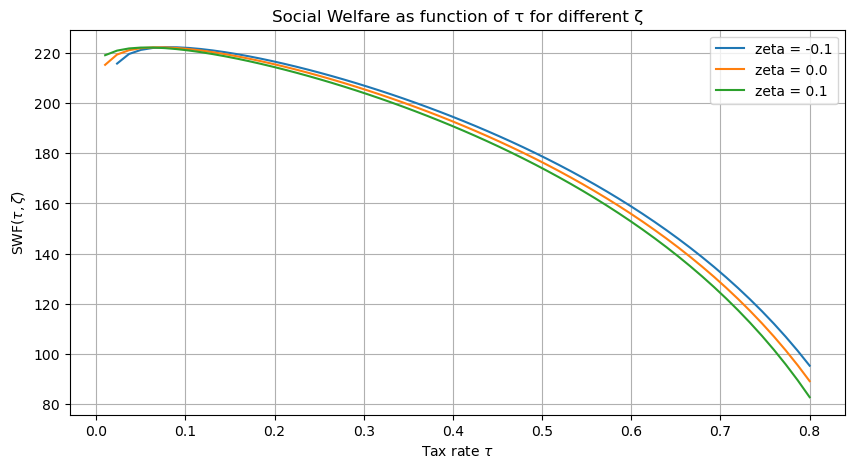

In [21]:
from Government import GovernmentClass

gov = GovernmentClass()
gov.run_exercise_21()


T = 417.8977922823345
SWF = 174.04499045420636


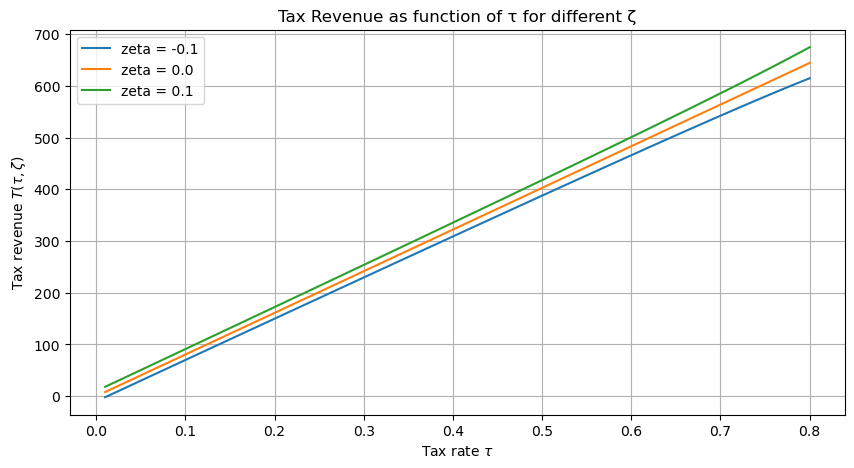

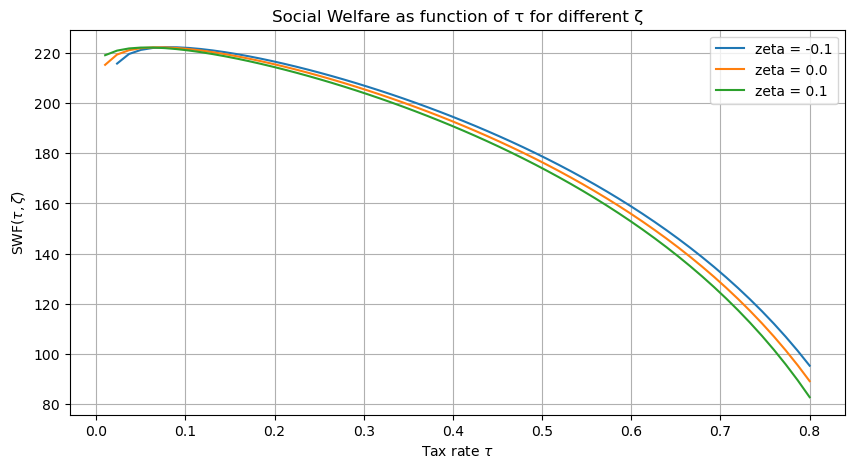

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Test-run
gov = GovernmentClass()
gov.par.tau = 0.50
gov.par.zeta = 0.10

gov.draw_productivities()
gov.solve_workers()

print("T =", gov.tax_revenue())
print("SWF =", gov.SWF())


# --------------------------------
# Parameter ranges
# --------------------------------
zeta_values = [-0.1, 0.0, 0.1]
tau_values = np.linspace(0.01, 0.80, 60)

# Storage dictionaries
T_results = {z: [] for z in zeta_values}
SWF_results = {z: [] for z in zeta_values}

# --------------------------------
# Loop over zeta and tau
# --------------------------------
for z in zeta_values:
    for tau in tau_values:

        gov = GovernmentClass()
        gov.par.zeta = z
        gov.par.tau = tau

        gov.draw_productivities()
        gov.solve_workers()

        T_results[z].append(gov.tax_revenue())
        SWF_results[z].append(gov.SWF())

# --------------------------------
# Plot T(tau, zeta)
# --------------------------------
plt.figure(figsize=(10,5))
for z in zeta_values:
    plt.plot(tau_values, T_results[z], label=f"zeta = {z}")
plt.xlabel(r"Tax rate $\tau$")
plt.ylabel(r"Tax revenue $T(\tau,\zeta)$")
plt.title("Tax Revenue as function of τ for different ζ")
plt.legend()
plt.grid(True)
plt.show()

# --------------------------------
# Plot SWF(tau, zeta)
# --------------------------------
plt.figure(figsize=(10,5))
for z in zeta_values:
    plt.plot(tau_values, SWF_results[z], label=f"zeta = {z}")
plt.xlabel(r"Tax rate $\tau$")
plt.ylabel(r"SWF($\tau,\zeta$)")
plt.title("Social Welfare as function of τ for different ζ")
plt.legend()
plt.grid(True)
plt.show()


## 2.2 Optimal tax system

__correct:)__

__you are however missing the revenue plot (with values close to the optimal) also i would consider vizualising the SWF close to the optimal values like in 2.1__

Optimal tau* = 0.13672839406024023
Optimal zeta* = -0.5231816756490937
Maximum SWF = 222.38403234429285

Starting at: [ 0.1 -0.9]

Starting at: [0.5 0. ]

Starting at: [0.9 0.9]

Starting at: [0.2 0.8]

Solutions from different starting guesses:
[ 0.1 -0.9]
[ 0.13678386 -0.52352488]
[0.9 0.9]
[ 0.13675626 -0.52327825]


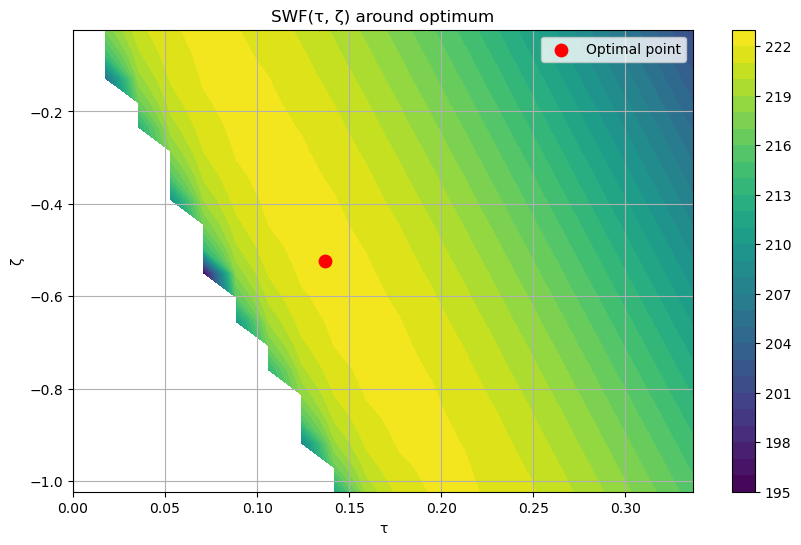

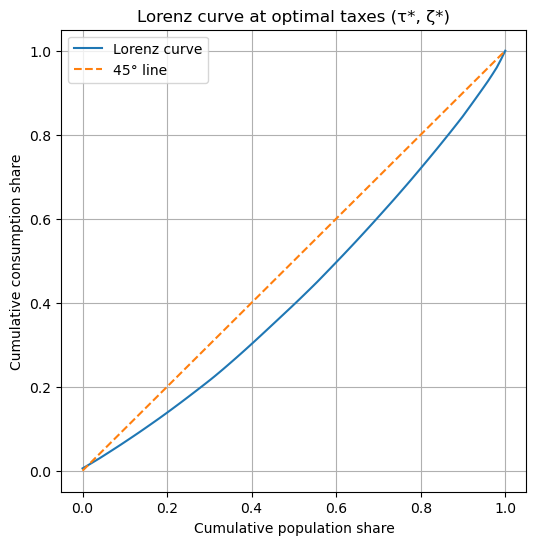

In [23]:
from scipy.optimize import minimize
import numpy as np
import matplotlib.pyplot as plt


# ============================================================
# 1. Objective function
# ============================================================
def obj_SWF(x):
    tau, zeta = x

    # Manual bounds (since Nelder-Mead does NOT support bounds)
    if tau < 0 or tau > 1:
        return 1e12
    if zeta < -1 or zeta > 1:
        return 1e12

    try:
        gov = GovernmentClass()
        gov.par.tau = float(tau)
        gov.par.zeta = float(zeta)

        gov.draw_productivities()
        gov.solve_workers()

        SWF_val = gov.SWF()

        # avoid NaN
        if SWF_val is None or not np.isfinite(SWF_val):
            return 1e12

        return -float(SWF_val)

    except Exception:
        return 1e12



# ============================================================
# 2. Optimize (tau, zeta) using Nelder-Mead
# ============================================================

x_init = np.array([0.3, 0.0])   # initial guess

result = minimize(
    obj_SWF,
    x0=x_init,
    method='Nelder-Mead',
    options={"maxiter": 3000, "xatol": 1e-6, "fatol": 1e-6}
)

tau_star, zeta_star = result.x

print("Optimal tau* =", tau_star)
print("Optimal zeta* =", zeta_star)
print("Maximum SWF =", -result.fun)



# ============================================================
# 3. Robustness check
# ============================================================

start_points = [
    [0.1, -0.9],
    [0.5, 0.0],
    [0.9, 0.9],
    [0.2, 0.8]   # avoid starting on boundary
]

solutions = []

for i, start in enumerate(start_points):
    start_arr = np.array(start, dtype=float)
    print("\nStarting at:", start_arr)

    result2 = minimize(
        obj_SWF,
        x0=start_arr,
        method='Nelder-Mead',
        options={"maxiter": 3000}
    )

    solutions.append(result2.x)

print("\nSolutions from different starting guesses:")
for sol in solutions:
    print(sol)



# ============================================================
# 4. Plot SWF(τ, ζ) around optimum
# ============================================================

tau_grid = np.linspace(max(0, tau_star - 0.2), min(1, tau_star + 0.2), 20)
zeta_grid = np.linspace(zeta_star - 0.5, zeta_star + 0.5, 20)

SWF_surface = np.zeros((len(zeta_grid), len(tau_grid)))

for i, z in enumerate(zeta_grid):
    for j, t in enumerate(tau_grid):

        gov = GovernmentClass()
        gov.par.tau = t
        gov.par.zeta = z

        try:
            gov.draw_productivities()
            gov.solve_workers()
            val = gov.SWF()
        except:
            val = np.nan

        if val is None or not np.isfinite(val):
            val = np.nan

        SWF_surface[i, j] = val

# Mask NaN to avoid white holes in contour plot
masked_surface = np.ma.array(SWF_surface, mask=np.isnan(SWF_surface))

plt.figure(figsize=(10,6))
CS = plt.contourf(tau_grid, zeta_grid, masked_surface, levels=30, cmap='viridis')
plt.colorbar(CS)
plt.scatter([tau_star], [zeta_star], color='red', label="Optimal point", s=80)
plt.xlabel("τ")
plt.ylabel("ζ")
plt.title("SWF(τ, ζ) around optimum")
plt.legend()
plt.grid(True)
plt.show()



# ============================================================
# 5. Lorenz curve for consumption at optimum
# ============================================================

gov = GovernmentClass()
gov.par.tau = tau_star
gov.par.zeta = zeta_star

gov.draw_productivities()
gov.solve_workers()

pi = gov.sol.pi
l = gov.sol.l
c = (1 - tau_star) * gov.par.w * pi * l - zeta_star  # FIXED: missing * signs

# Lorenz curve
c_sorted = np.sort(c)
cumsum_rel = np.cumsum(c_sorted) / np.sum(c_sorted)
pop = np.linspace(0, 1, len(c))

plt.figure(figsize=(6,6))
plt.plot(pop, cumsum_rel, label="Lorenz curve")
plt.plot([0,1], [0,1], '--', label="45° line")
plt.xlabel("Cumulative population share")
plt.ylabel("Cumulative consumption share")
plt.title("Lorenz curve at optimal taxes (τ*, ζ*)")
plt.legend()
plt.grid(True)
plt.show()

#test


# 3. Top tax

## 3.1 Labor supply

__Summary of Findings :__

OBS: Der er vidst en fejl, da der meget højt optimalt time antal 

For all values of p, the numerical optimizer and the 4-step FOC method deliver the same optimal labor supply. The optimizers identify the same maximum of utility, and the FOC crosses zero at the same point. The top-tax kink changes the shape of the FOC, but not the optimal choice.

__There are unfortunately several issues in this code. The main ones are:__

get_min_ell() is incorrect when a top tax (kink) is present.
The positivity condition for consumption depends on whether labor supply is below or above the kink. The current implementation ignores this and therefore allows infeasible labor choices.

FOC root finding does not verify a sign change.
root_scalar is used without first checking that the FOC changes sign over the search interval, which can lead to invalid or spurious solutions.

The FOC uses an incorrect marginal tax rate.
The marginal tax rate should depend on whether income is below or above the kink, but this is not handled consistently.

The four-step kink logic is not fully correct mathematically.
The FOC is discontinuous at the kink, so roots must be searched separately on each side and compared with the kink point itself. The current implementation does not fully enforce this logic.

__hint: at p=1 ell* should be 8.265__

ℓ* (optimizer) = 12.897015485, U = 1.254071323
ℓ* (4-step FOC) = 12.897015647, U = 1.254071323


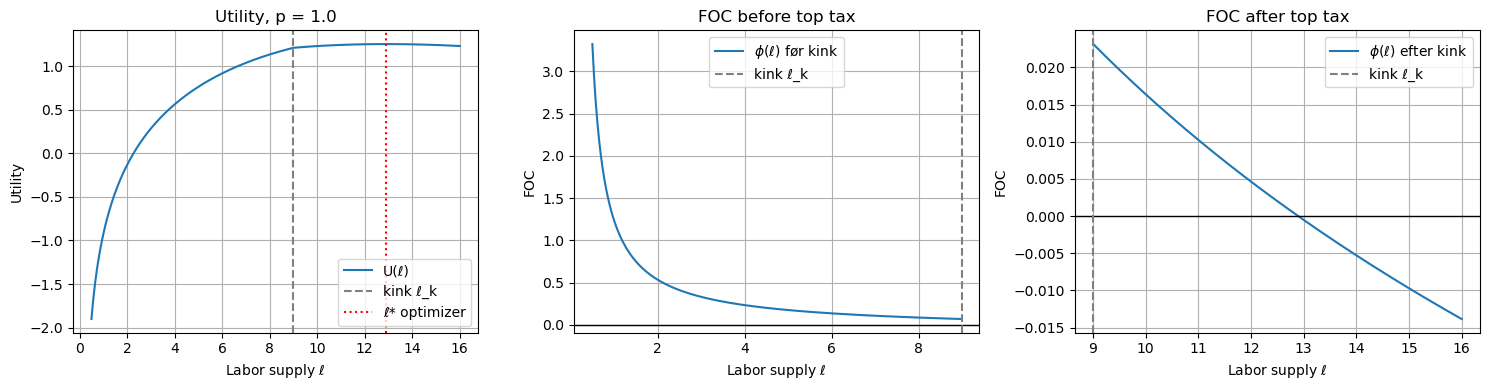

ℓ* (optimizer) = 13.393599607, U = 1.369442704
ℓ* (4-step FOC) = 13.393600675, U = 1.369442704


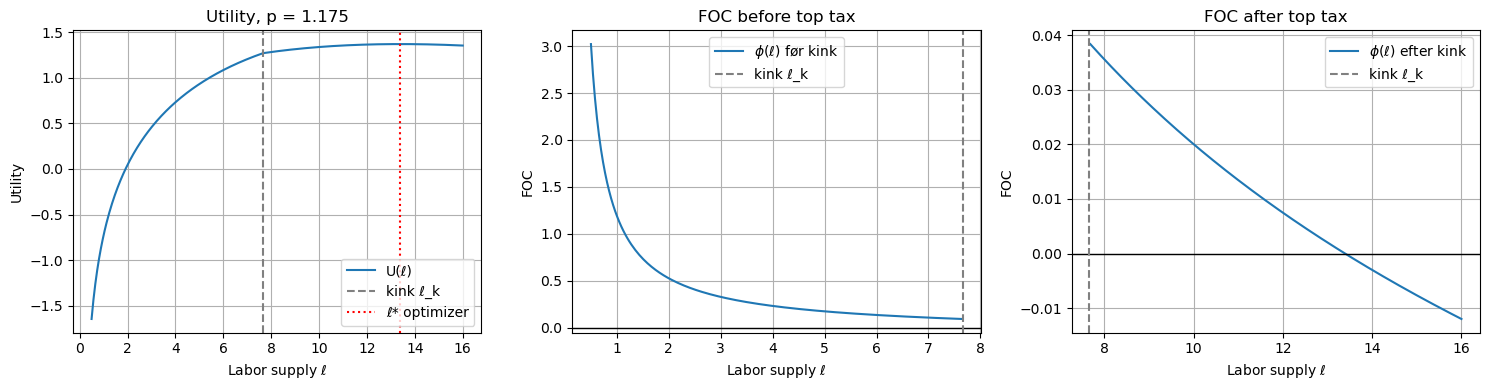

ℓ* (optimizer) = 14.024235104, U = 1.555611023
ℓ* (4-step FOC) = 14.024236060, U = 1.555611023


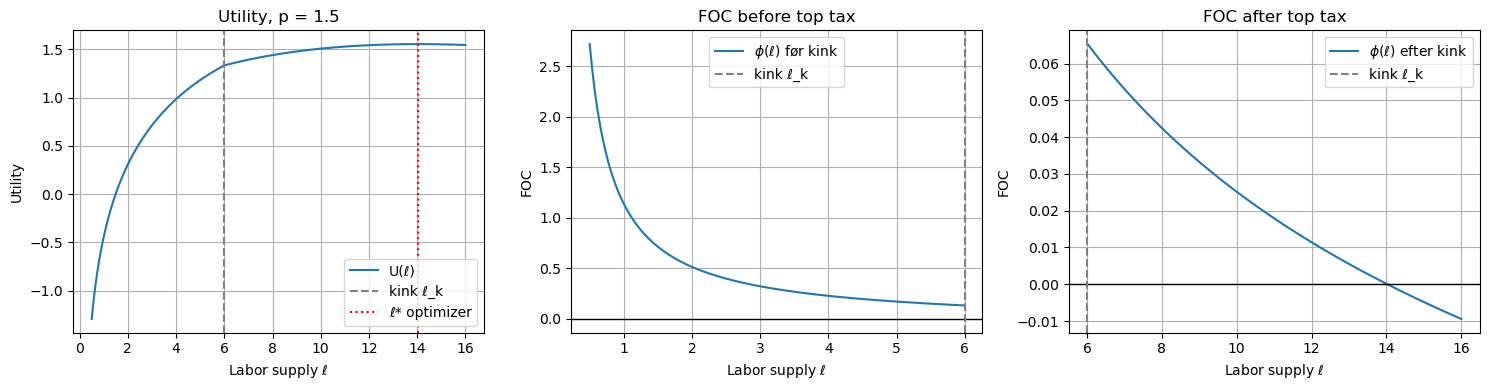

In [24]:
worker.plot_top_tax(1.0)
worker.plot_top_tax(1.175)
worker.plot_top_tax(1.5)

## 3.2 Labor supply function

__Summary of Findings :__

Labor supply increases with productivity. Almost no one chooses the before-kink solution, a small share works exactly at the kink, and most workers choose the after-kink region. The top tax therefore affects only a small part of the population.

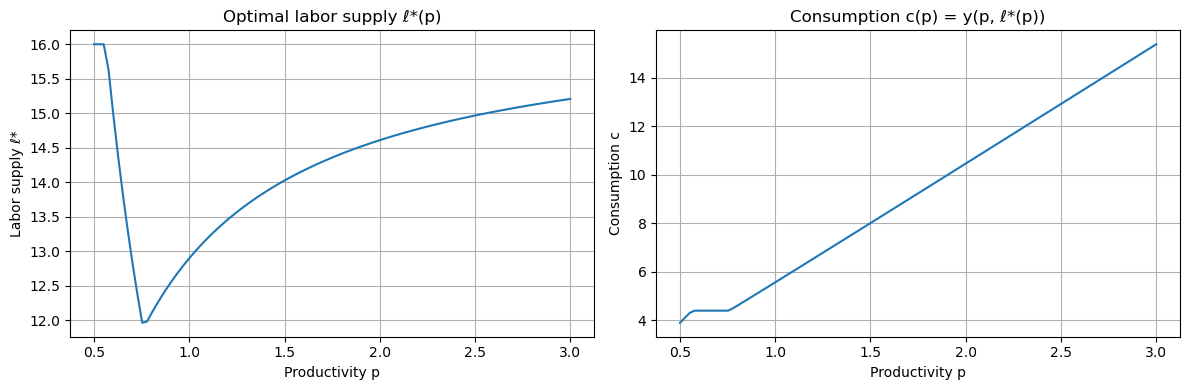

Share with ℓ* = ℓ^b (before kink): 0.000
Share with ℓ* = ℓ^k (at kink):      0.080
Share with ℓ* = ℓ^a (after kink):   0.890


In [25]:
worker.plot_labor_and_consumption_top()
share_b, share_k, share_a = worker.region_proportions_top()

## 3.3 Public good

# 4. Extension